# Recipe Recomendation Project

### Trabalho Final - TERA - Recomendação
Francisco Ottoni, Giovana Bandinelli, Madson Nascimento de Lima e Sonia Gondo

Fonte do banco de dados: https://www.kaggle.com/code/takuyaishii/recipe-preprocessing/data

Colunas da base:

RecipeId : Id da receita

Name : Nome da receita

CookTime : Tempo de cozimento

PrepTime : Tempo de preparo

TotalTime : Tempo total de preparo (Cozimento + Preparo)

Description : Descrição da receita

Images : link das imagens

RecipeCategory : Categoria da receita

Keywords : Palavras chaves da receita

RecipeIngredientQuantities: Quantidade de cada ingrediente

RecipeIngredientParts: Ingredientes

AggregatedRating: Média das avaliações da receita

Calories: Valor colórico da receita

RecipeServings: Quantidade de pessoas servidas

RecipeYield: Rendimento da receita

RecipeInstructions: Instruções da receita

reviews_in_dict: Avaliações da receita no formato de um dicionário

### Bibliotecas e Configurações

In [510]:
#import de libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [511]:
#import From
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [512]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

### Leitura dos dados

In [513]:
df = pd.read_csv('recipe_10000.csv')
recipes = df.copy()
recipes.head()



,Unnamed: 0,index,RecipeId,Name,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict
0,0,0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,['https://img.sndimg.com/food/image/upload/w_5...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...","{579149: {'Rating': 5, 'Review': 'Yummy, yummy..."
1,1,4,39,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,['https://img.sndimg.com/food/image/upload/w_5...,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,"{361851: {'Rating': 3, 'Review': 'I have an In..."
2,2,5,40,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,['https://img.sndimg.com/food/image/upload/w_5...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ..."
3,3,14,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,['https://img.sndimg.com/food/image/upload/w_5...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...","{48870: {'Rating': 5, 'Review': 'I thought thi..."
4,4,16,42,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,['https://img.sndimg.com/food/image/upload/w_5...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,"{46368: {'Rating': 5, 'Review': 'This is a ver..."


### EDA

In [514]:
#informações sobre nome de colunas, numero de linhas e dtype

recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10000 non-null  int64  
 1   index                       10000 non-null  int64  
 2   RecipeId                    10000 non-null  int64  
 3   Name                        10000 non-null  object 
 4   CookTime                    10000 non-null  object 
 5   PrepTime                    10000 non-null  object 
 6   TotalTime                   10000 non-null  object 
 7   Description                 10000 non-null  object 
 8   Images                      10000 non-null  object 
 9   RecipeCategory              10000 non-null  object 
 10  Keywords                    10000 non-null  object 
 11  RecipeIngredientQuantities  10000 non-null  object 
 12  RecipeIngredientParts       10000 non-null  object 
 13  AggregatedRating            1000

In [515]:
#exibindo o número de linhas e colunas iniciais

print('nosso dataset contém {} linhas e {} colunas.'.format(recipes.shape[0], recipes.shape[1]))

nosso dataset contém 10000 linhas e 19 colunas.


In [516]:
#Contando valores únicos

recipes.nunique()

Unnamed: 0                    10000
index                         10000
RecipeId                      10000
Name                           9653
CookTime                        152
PrepTime                         74
TotalTime                       328
Description                    9861
Images                        10000
RecipeCategory                  173
Keywords                       8084
RecipeIngredientQuantities     9539
RecipeIngredientParts          9920
AggregatedRating                  9
Calories                       5917
RecipeServings                   40
RecipeYield                    1472
RecipeInstructions             9999
reviews_in_dict               10000
dtype: int64

In [517]:
#contagem de valores nulos por coluna

recipes.isnull().sum().sort_values(ascending=False)

RecipeYield                   7001
RecipeServings                3853
Unnamed: 0                       0
Keywords                         0
RecipeInstructions               0
Calories                         0
AggregatedRating                 0
RecipeIngredientParts            0
RecipeIngredientQuantities       0
RecipeCategory                   0
index                            0
Images                           0
Description                      0
TotalTime                        0
PrepTime                         0
CookTime                         0
Name                             0
RecipeId                         0
reviews_in_dict                  0
dtype: int64

In [518]:
#categorias das receitas

recipes['RecipeCategory'].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Chicken', 'Pie', 'Dessert', 'Southwestern U.S.',
       'Stew', 'Lactose Free', 'Sauces', 'Brazilian', 'Potato', 'Cheese',
       'Lamb/Sheep', 'Scones', 'Drop Cookies', 'Weeknight',
       'Quick Breads', 'Low Protein', 'Curries', '< 60 Mins', '< 30 Mins',
       'Lunch/Snacks', 'Steak', 'Lobster', 'Pork', 'Chicken Livers',
       'Crab', 'Very Low Carbs', 'Chowders', 'Meat', 'Breakfast',
       'Hungarian', 'German', 'Onions', 'Bar Cookie', 'Indonesian',
       'Lentil', 'High Protein', 'Greek', 'Pineapple', 'Peppers',
       'Cauliflower', 'Breads', 'Yeast Breads', 'Fruit', 'Free Of...',
       'European', 'Mexican', 'Beans', 'One Dish Meal', 'Savory Pies',
       'Cheesecake', 'Candy', 'Long Grain Rice', 'Whole Chicken',
       '< 15 Mins', 'Rice', 'Apple', 'Tuna', 'Spaghetti', 'Jellies',
       'Gelatin', 'Healthy', 'Low Cholesterol', 'Shakes', 'Chutneys',
       'Tex Mex', 'Veal', 'Mussels',

In [519]:
recipes['RecipeCategory'].value_counts()

Dessert          1037
Lunch/Snacks      930
Vegetable         730
One Dish Meal     616
Chicken           510
                 ... 
Danish              1
Goose               1
African             1
Ethiopian           1
Wild Game           1
Name: RecipeCategory, Length: 173, dtype: int64

In [520]:
#quantidade de receitas por tempo total de preparo

recipes['TotalTime'].value_counts()

PT30M        712
PT25M        660
PT40M        657
PT35M        605
PT45M        545
            ... 
PT25H50M       1
PT7H25M        1
PT288H30M      1
PT336H8M       1
PT24H5M        1
Name: TotalTime, Length: 328, dtype: int64

**RESULTADOS:** 
- nosso dataset contém 10000 linhas e 19 colunas;
- Só existem Valores Nulos em Duas colunas que são: RecipeYield e RecipeServings;
- Existem colunas que tentam repetir o index e não significam nada para o projeto (unnamed:0 e index) além de uma coluna com links de imagens que não vamos utilizar nesse momento;
- Existem muitas entradas difentes nas variavies de recipe category;
- Nosso dataset possuem váriaveis de tempo que são díficeis de serem útilizadas antes de realizar alguma transformação.

### Primeiras alterações, Transformação nas váriaveis de tempo e criação de colunas

In [521]:
#drop de colunas que não serão utilizadas

recipes.drop(columns=['Unnamed: 0', 'index', 'Images', 'RecipeId'], inplace=True)
recipes_final = recipes.copy()

In [522]:
#Usando regex para criar coluna de Horas

recipes['hours'] = recipes.TotalTime.str[2:].map(lambda x: re.search("^(.*?)[H]", x))
recipes['hours'] = recipes['hours'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [523]:
#usando regex para criar coluna de minutos

recipes['minutes'] = recipes.TotalTime.str[2:].map(lambda x: re.search("[0-9]{1,}M", x))
recipes['minutes'] = recipes['minutes'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [524]:
#Criando coluna de tempo total em minutos

recipes['totaltime_min'] = (recipes["hours"].astype("int64") * 60) + recipes['minutes'].astype("int64")

##### old version

##### 

In [525]:
### Criando coluna de classificação de caloria

recipes['calories_classification'] = pd.qcut(recipes['Calories'],3, labels = ['Low','Medium','High'])

In [526]:
# criando lista para filtrar as 11 colunas de categoria de receitas com mais amostrar do dataset

food_category = ['Dessert',
                 'Lunch/Snacks',
                 'Vegetable',
                 'One Dish Meal',
                 'Chicken',
                 'Breads', 
                 'Quick Breads', 
                 'Pork',
                 'Breakfast',
                 'Potato',
                 'Meat']

#copiando apenas a coluna de catégoria de comidas

filtro = recipes.RecipeCategory.copy()

In [527]:
#criando função para concatenar as outras categorias menos importantes:

def cat_food(x):
    if x in food_category:
        return x
    else:
        return 'Outros'

In [528]:
#realizando a transformação

filtro = filtro.map(cat_food)

### Graficos

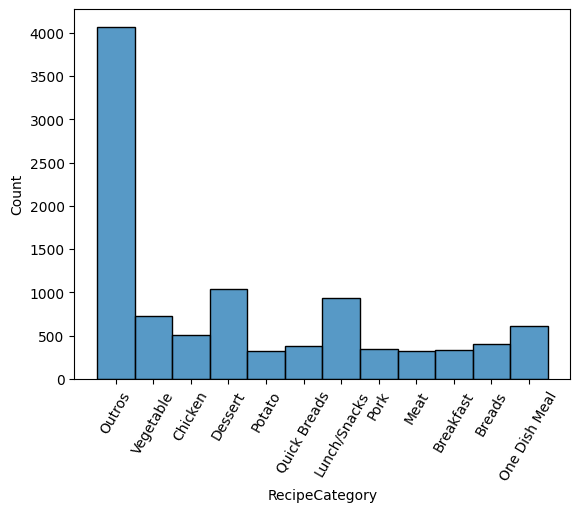

In [529]:
#histograma com as 12 categorias com mais receitas.

sns.histplot(filtro,  )
plt.xticks(rotation=60)
plt.show()

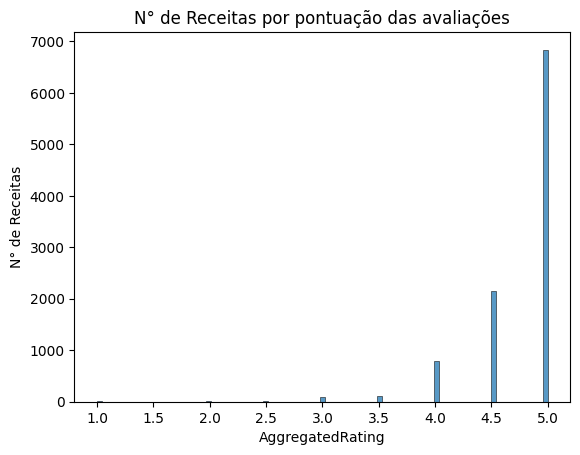

In [530]:
sns.histplot(recipes['AggregatedRating'])
plt.title('N° de Receitas por pontuação das avaliações')
#plt.savefig('Histograma_avaliação_receitas.png', format='png')
plt.ylabel('N° de Receitas');

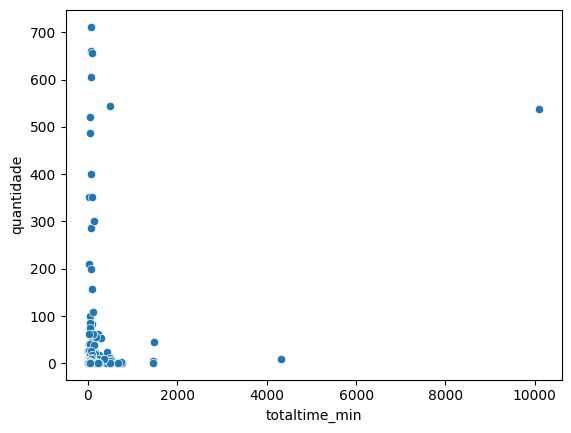

In [531]:
#Plot da distribuição da quantidade de receitas por tempo total

sns.scatterplot(x = recipes.totaltime_min, y = recipes.totaltime_min.value_counts())
plt.ylabel('quantidade')
plt.show()

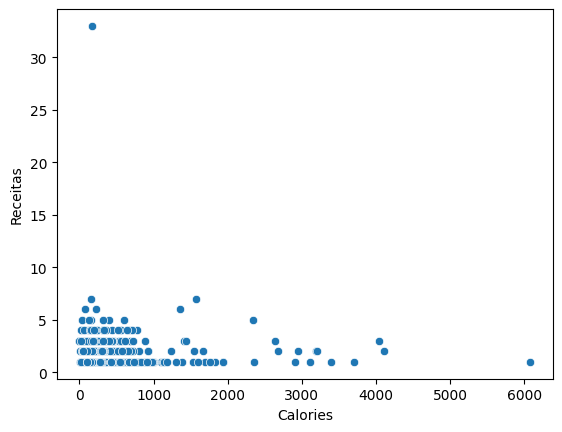

In [532]:
#Plot da distribuição das calorias

sns.scatterplot(x = recipes.Calories, y = recipes.Calories.value_counts())
plt.ylabel('Receitas')
plt.show()

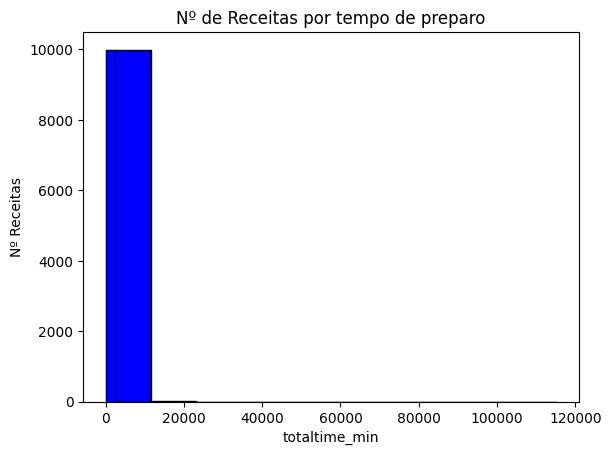

In [533]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

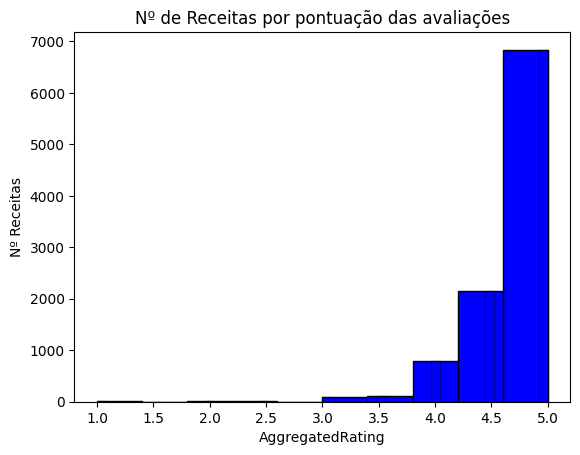

In [534]:

# matplotlib histogram

plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

**Resultados:**
- Existem muitas catégorias de receitas pequenas, que ao serem agrupadas, se tornam a maior catégoria presente no dataset, a catégoria que possuí mais entradas são *desert* seguida por *Lunch/snacks*;

- As notas atribuidas as nossas receitas não são confiaveis já que praticamente todas elas recebem 5 estrelas, fazendo com que haja pouca confiabilidade nessa váriavel;

- A maior distribuição de receitas se encontra no intevalo de 0m até 1900m, entretanto existem observasão com 10000m que equivalem a quase 7 dias de preparo;

##### Graficos e alterações antigas

#Plot da distribuição da quantidade de receitas por tempo de preparo

sns.scatterplot(x=recipes.preptime_min, y= recipes.preptime_min.value_counts())
plt.ylabel('Quantidade')
plt.show()

#Plot da distribuição da quantidade de receitas por tempo de cozimento

sns.scatterplot(x=recipes.cooktime_min, y= recipes.cooktime_min.value_counts())
plt.ylabel('Quantidade')
plt.show()

#dropando receitas que possuem mais de 72h de tempo de cozimento

lista = recipes[recipes.cooktime_min > 4320].index.to_list()
recipes.drop(index=lista, inplace=True)

#####

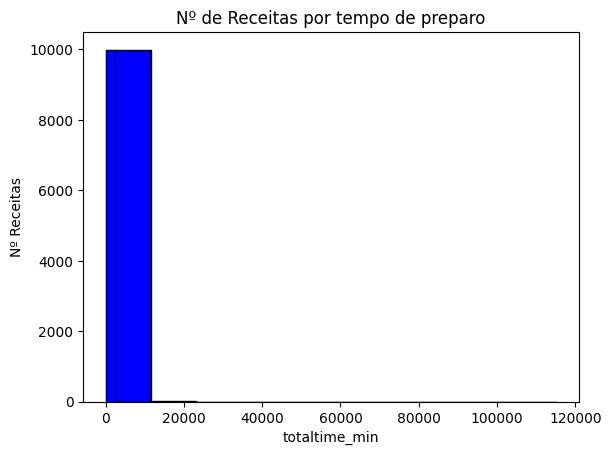

In [535]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

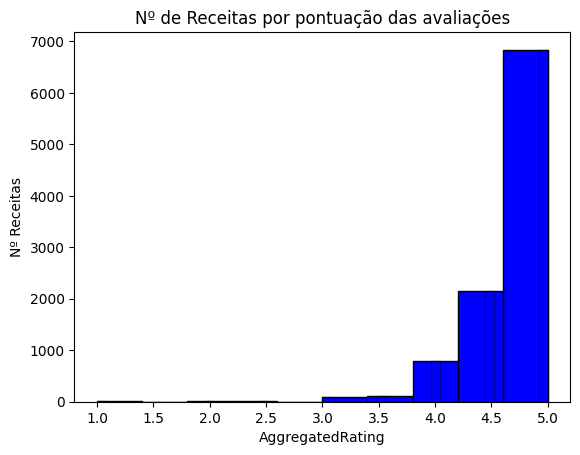

In [536]:

# matplotlib histogram
plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

### EDA 2

In [537]:
#dropando colunas adicionais:
recipes.drop(columns=['RecipeId', 'CookTime', 'PrepTime', 'TotalTime', 'reviews_in_dict', ], inplace=True)
recipes.head()

KeyError: "['RecipeId'] not found in axis"

In [ ]:
#explorando as colunas
recipes.describe().round(2)

,AggregatedRating,Calories,RecipeServings,totaltime_min
count,10000.00,10000.00,6147.00,10000.00
mean,4.77,493.86,7.62,126.62
std,0.41,742.02,7.51,1484.11
min,1.00,0.00,1.00,1.00
25%,4.50,177.78,4.00,27.00
50%,5.00,312.75,6.00,45.00
75%,5.00,514.92,8.00,72.00
max,5.00,13598.20,128.00,115230.00


In [ ]:
#explorando as colunas
recipes.describe(include=np.object)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,RecipeYield,RecipeInstructions,hours,minutes
count,10000,10000,10000,10000,10000,10000,2999,10000,10000,10000
unique,9653,9861,173,8084,9539,9920,1472,9999,44,60
top,Banana Bread,Make and share this Banana Bread recipe from F...,Dessert,['< 60 Mins'],['1'],[],1 loaf,['Cook beans according to package directions.'...,0,30
freq,12,7,1037,75,32,20,119,2,6330,1056


**Resultados:**

### Tratamento de texto

#### Funções

In [ ]:
#função para remover pontos e virgulas substituindo por espaços.

def clean_text(text: str) -> str:
    cleaned = text.lower()
    cleaned = re.sub(r'[^\w\s]', ' ', cleaned)
    return cleaned

In [ ]:
#Função para remover stopwords em inlgês:

stopwords = nltk.corpus.stopwords.words('english')

def stopwords_remove(x):
    text_list = word_tokenize(x)
    filtered_sentence = []
    filtered_sentence = [w for w in text_list if not w.lower() in stopwords]
    for w in text_list:
        if w not in stopwords:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    return text

In [ ]:
#Função para obter rootwords:

ps = PorterStemmer()

def stemmer_words(text):
    word_tokens = word_tokenize(text)
    stemmer_words = ' '.join(ps.stem(word) for word in word_tokens)
    return stemmer_words

In [ ]:
def module(x):
    v = x
    normalized_v = normalize(v, axis=0).ravel()
    modulo = np.linalg.norm(normalized_v)
    return modulo

#### Abordagem


In [ ]:
#função para aplicar a vetorização no dataset

def vectorize_txt(text):
    list_word = []
    list_word.append(text)
    matrix = vec.transform(list_word)
    return matrix.toarray()

In [ ]:
coluna_texto = ['RecipeInstructions',
 'RecipeIngredientParts',
 'RecipeCategory',
 'Name',
 'Description',
 'Keywords']

In [ ]:
def transform(x):
    
    y = str(x)+'_'+'clean'  
    recipes[y] = recipes[x].map(clean_text)
    recipes[y] = recipes[y].map(stopwords_remove)
    recipes[y] = recipes[y].map(stemmer_words)
    return recipes[y]
    

In [ ]:
for i in coluna_texto:
    transform(i)


In [ ]:
vec=TfidfVectorizer()
vec.fit(recipes['RecipeIngredientParts_clean'])
recipes['RecipeIngredientParts_vector'] = recipes['RecipeInstructions_clean'].map(vectorize_txt)
recipes['RecipeIngredientParts_module'] = recipes['RecipeIngredientParts_vector'].map(module)

In [ ]:
vec=TfidfVectorizer()
vec.fit(recipes['RecipeCategory_clean'])
recipes['RecipeCategory_vector']= recipes['RecipeCategory_clean'].map(vectorize_txt)
recipes['RecipeCategory_module'] = recipes['RecipeCategory_vector'].map(module)

In [ ]:
vec=TfidfVectorizer()
vec.fit(recipes['Name_clean'])
recipes['Name_vector']= recipes['Name_clean'].map(vectorize_txt)
recipes['RecipeCategory_module'] = recipes['RecipeCategory_vector'].map(module)

In [ ]:
vec=TfidfVectorizer()
vec.fit(recipes['Description_clean'])
recipes['Description_vector']= recipes['Description_clean'].map(vectorize_txt)
recipes['Description_module'] = recipes['Description_vector'].map(module)

In [ ]:
vec=TfidfVectorizer()
vec.fit(recipes['Keywords_clean'])
recipes['Keywords_vector']= recipes['Keywords_clean'].map(vectorize_txt)
recipes['Keywords_module'] = recipes['Keywords_vector'].map(module)

In [ ]:
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,toss 2 cup berri sugar let stand 45 minut stir...,blueberri granul sugar vanilla yogurt lemon ju...,frozen dessert frozen dessert,low fat berri blue frozen dessert low fat berr...,make share low fat berri blue frozen dessert r...,dessert low protein low cholesterol healthi fr...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.316625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[[0.10102373640425588, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,1 quart jar tight fit lid put sugar lemon peel...,sugar lemon rind lemon zest fresh water fresh ...,beverag beverag,best lemonad best lemonad,one first good hous keep cookbook must use zes...,low protein low cholesterol healthi summer 60 ...,"[[0.0, 0.0, 0.3719720196342264, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.291503,"[[0.0, 0.0, 0.25106071496769267, 0.0, 0.0, 0.0...",2.645751
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,drain tofu care squeez excess water pat dri pa...,extra firm tofu eggplant zucchini mushroom soy...,soy tofu soy tofu,carina tofu veget kebab carina tofu veget kebab,dish best prepar day advanc allow ingredi soak...,bean veget low cholesterol weeknight broil gri...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6.557439,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.828427

### Modelagem

In [ ]:
encoder = LabelEncoder()
recipes['RecipeIngredientQuantities'] = encoder.fit_transform(recipes['RecipeIngredientQuantities'])

In [ ]:
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...",8284,"['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,toss 2 cup berri sugar let stand 45 minut stir...,blueberri granul sugar vanilla yogurt lemon ju...,frozen dessert frozen dessert,low fat berri blue frozen dessert low fat berr...,make share low fat berri blue frozen dessert r...,dessert low protein low cholesterol healthi fr...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.316625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...",3403,"['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[[0.10102373640425588, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...",77,"['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,1 quart jar tight fit lid put sugar lemon peel...,sugar lemon rind lemon zest fresh water fresh ...,beverag beverag,best lemonad best lemonad,one first good hous keep cookbook must use zes...,low protein low cholesterol healthi summer 60 ...,"[[0.0, 0.0, 0.3719720196342264, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.291503,"[[0.0, 0.0, 0.25106071496769267, 0.0, 0.0, 0.0...",2.645751
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...",4709,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,drain tofu care squeez excess water pat dri pa...,extra firm tofu eggplant zucchini mushroom soy...,soy tofu soy tofu,carina tofu veget kebab carina tofu veget kebab,dish best prepar day advanc allow ingredi soak...,bean veget low cholesterol weeknight broil gri...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6.557439,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.828427
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...",8674,"['plain to

In [ ]:
colunas = ['RecipeIngredientParts_module',
            'RecipeCategory_module',
            'Description_module',
            'Keywords_module',
            'Calories',
            'AggregatedRating',
            'totaltime_min',
            'RecipeIngredientQuantities']

scaler = MinMaxScaler()
scale = scaler.fit_transform(recipes[colunas])
recipes_scale = pd.DataFrame(scale, columns= [colunas])

In [ ]:
recipes_scale

,RecipeIngredientParts_module,RecipeCategory_module,Description_module,Keywords_module,Calories,AggregatedRating,totaltime_min,RecipeIngredientQuantities
0,0.444444,0.565826,0.101413,0.503851,0.012568,0.875,0.012879,0.868526
1,0.824022,0.565826,0.000000,0.503851,0.081680,0.500,0.002291,0.356783
2,0.430331,0.000000,0.332379,0.383491,0.022878,0.875,0.000295,0.008073
3,0.728604,0.565826,0.083362,0.426058,0.039424,0.875,0.012662,0.493709
4,0.333333,0.000000,0.022953,0.466037,0.007619,0.875,0.000425,0.909415
...,...,...,...,...,...,...,...,...
9995,0.521157,0.000000,0.044318,0.233019,0.006501,1.000,0.000425,0.963095
9996,0.675863,0.000000,0.523795,0.426058,0.072083,1.000,0.001120,0.102642
9997,0.222222,0.000000,0.064383,0.337758,0.008435,1.000,0.000338,0.752149
9998,0.484322,0.000000,0.083362,0.233019,0.012413,0.875,0.000165,0.935940


In [ ]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(recipes_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

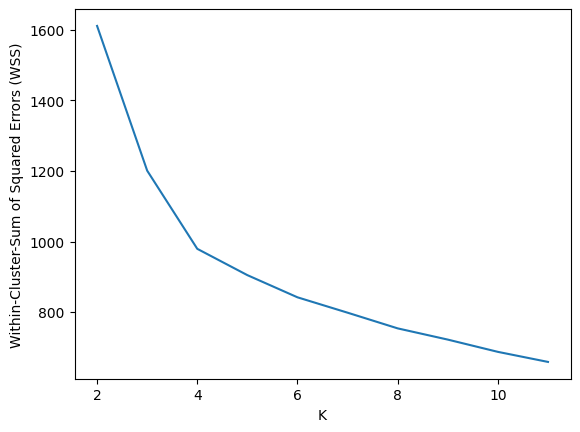

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(recipes_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is " +str(metrics.silhouette_score(recipes_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.37625953045499033
Silhouette score for k(clusters) = 3 is 0.33302175319264954
Silhouette score for k(clusters) = 4 is 0.3355768152342472
Silhouette score for k(clusters) = 5 is 0.23871189463916376
Silhouette score for k(clusters) = 6 is 0.2430079186099864
Silhouette score for k(clusters) = 7 is 0.24606989297797197
Silhouette score for k(clusters) = 8 is 0.2181070663214388
Silhouette score for k(clusters) = 9 is 0.20339731574634373
Silhouette score for k(clusters) = 10 is 0.19261441164180812
Silhouette score for k(clusters) = 11 is 0.19804653555358154
Silhouette score for k(clusters) = 12 is 0.1878598637411377


In [ ]:
kmeans  =  cluster.KMeans(n_clusters = 7, init = "k-means++") 
kmeans  =  kmeans.fit(recipes_scale[colunas])

In [ ]:
recipes_final['Clusters'] = kmeans.labels_

In [ ]:
recipes_final.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...","{579149: {'Rating': 5, 'Review': 'Yummy, yummy...",5
1,39,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,"{361851: {'Rating': 3, 'Review': 'I have an In...",1
2,40,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ...",0
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...","{48870: {'Rating': 5, 'Review': 'I thought thi...",5
4,42,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,"{46368: {'Rating': 5, 'Review': 'This is a ver...",2


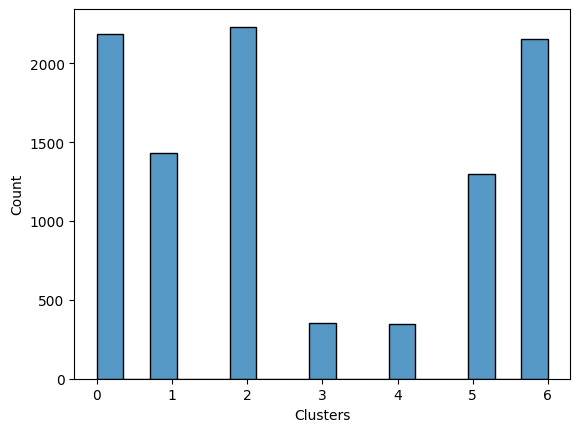

In [ ]:
sns.histplot(data=recipes_final, x='Clusters');

In [ ]:
filtro_0 = recipes_final[recipes_final.Clusters == 0]

In [538]:
filtro_0.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
2,40,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ...",0
13,58,Low-Fat Burgundy Beef & Vegetable Stew,PT2H14M,PT30M,PT2H44M,Make and share this Low-Fat Burgundy Beef & Ve...,Stew,"['Vegetable', 'Meat', 'Low Cholesterol', 'Heal...","['1 1/2', '1', '1', '1/2', '1/2', '1', '1/2', ...","['beef eye round', 'dried thyme leaves', 'salt...",4.5,280.1,6.0,NaN,"['Trim fat from beef, cut into 1-inch pieces.'...","{541614: {'Rating': 3, 'Review': 'This was an ...",0
22,104,Cheeseburger Casserole,PT25M,PT15M,PT40M,This is popular with the kids especially. My h...,Cheese,"['Meat', '< 60 Mins', 'Oven']","['1 1/2', '1 -2', '1/4', '1', '1/2', '1', '1/8...","['flour', 'ground beef', 'onion', 'tomato sauc...",4.5,543.5,6.0,NaN,['Combine ground beef and flour in skillet. Ad...,"{2372: {'Rating': 3, 'Review': 'Fast and easy....",0
39,187,Chicken-Fried Steak With Cracked Pepper Gravy,PT15M,PT1H20M,PT1H35M,Make and share this Chicken-Fried Steak With C...,Steak,"['Poultry', 'Meat', 'Weeknight', '< 4 Hours']","['1 1/2', '1 1/2', '2', '1', '2', '1/2', '1/2'...","['flour', 'salt', 'pepper', 'cayenne', 'eggs',...",5.0,1635.7,4.0,3 cups,['Prepare the flour spice by blending the flou...,"{369220: {'Rating': 5, 'Review': ""A very tasty...",0
48,224,Chocolate Tapioca Pudding,PT20M,PT30M,PT50M,Make and share this Chocolate Tapioca Pudding ...,Dessert,"['Free Of...', '< 60 Mins']","['1', '3', '1/8', '3 2/3', '1', '2', '2', '1']","['sugar', 'tapioca', 'salt', 'milk', 'egg', 'i...",5.0,230.5,8.0,NaN,"['Combine sugar, tapioca, and salt in a saucep...","{145361: {'Rating': 0, 'Review': ""It doesn't s...",0
